### Import Modules

In [1]:
import cv2
from IPython.display import Image, display
import matplotlib.pyplot as plt
import numpy as np

### Part 1: Loading the video and taking the average of its frames

We can load the video using the `VideoCapture` function from OpenCV. The function takes the path to the video file as an argument. The function returns a `VideoCapture` object that we can use to read the video frame by frame.

In [2]:
cap = cv2.VideoCapture('MRI-Head.avi')

Now we can get the width and height the video. We need them to create our initial sum_array that will hold the sum of all the frames in the video.

In [3]:
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width, height

(256, 256)

Now we can iterate over the video frames to take the average:

In [4]:
# Read until video is completed
sum_frames = np.zeros((height, width), dtype=np.uint32)
num_frames = 0
first_frame = np.zeros((height, width), dtype=np.uint8)
first = True
while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()    
    if ret == True:
        # converting to grayscale
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # saving the first frame
        if first:
            first_frame = frame
            first = False        
        # Display the resulting frame
        cv2.imshow('Frame', frame)
        # summing the frames
        sum_frames = sum_frames + frame
        num_frames += 1
        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    # Break the loop
    else: 
        break

finally, we divide our sum_array by number of frames to get the average frame. We can then compare our average frame to the first frame of the video to see if they are the same.

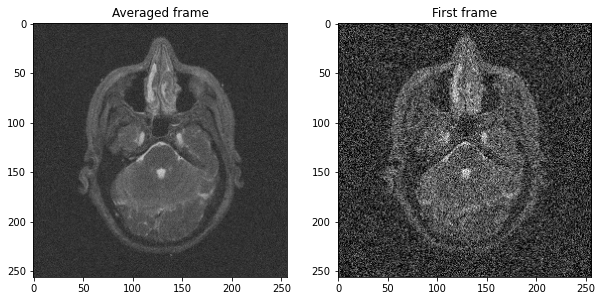

In [5]:
# Taking the average of the frames
avg_frames = sum_frames / float(num_frames)
avg_frames = avg_frames.astype(np.uint8)
# Showing the first and the averaged frame
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(avg_frames, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Averaged frame')

ax[1].imshow(first_frame, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('First frame')

plt.show()


### Part 2: Describing the masks

we can use `np.load` to load the masks located in this folder:

In [6]:
mask1 = np.load('mask1.npy')
mask2 = np.load('mask2.npy')

Now we multiply each mask to the average frame to see the effect of each mask on the average frame.

In [7]:
mask1_result = mask1 * avg_frames
mask2_result = mask2 * avg_frames

Finally we can show the results.

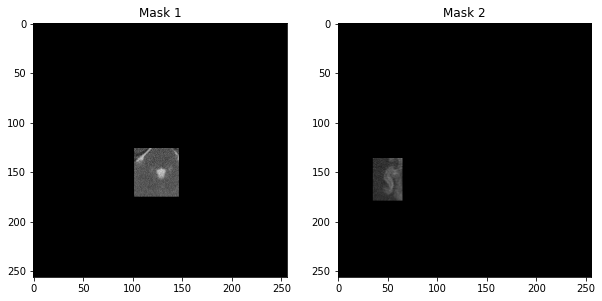

: 

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(mask1_result, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Mask 1')

ax[1].imshow(mask2_result, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Mask 2')

plt.show();

As you can see the masks extract 2 different parts of the image. The first one extrcts a part of the brain while the second one extracts the ear of the person. I'm not a student of biomedical engineering so I don't know the exact name of these parts.